Loading package / other files

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm

Import and adapt df

In [5]:
importlib.reload(dm)
originial_df = pd.read_csv("data.txt", sep="\t")
df = dm.build_adapted_df(originial_df);df

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Series Name,,,,,,,,,,,,,,,,,,,,,
"Adolescents out of school, male (% of male lower secondary school age)",NaN,5.903310,NaN,NaN,NaN,NaN,5.570900,0.138270,7.776090,NaN,...,1.305430,4.398410,NaN,10.698010,NaN,NaN,9.226390,22.633860,NaN,NaN
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,1000.000000,100.000000,1900.000000,NaN,NaN,23000.000000,NaN,5500.000000,NaN,NaN,...,810.000000,4300.000000,NaN,NaN,9400.000000,NaN,NaN,870.000000,61000.000000,44000.000000
CO2 emissions (kt),5300.000191,4480.000019,154910.003662,NaN,469.999999,29760.000229,500.000000,183160.003662,5070.000172,NaN,...,6519.999981,105230.003357,180.000007,151070.007324,223720.001221,NaN,NaN,10850.000381,5320.000172,11020.000458
CO2 emissions from gaseous fuel consumption (kt),319.029000,161.348000,78741.491000,NaN,0.000000,1496.136000,0.000000,102268.963000,4191.381000,0.000000,...,106.343000,75012.152000,0.000000,48796.769000,20384.853000,NaN,0.000000,986.423000,0.000000,0.000000
"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)",2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,2.000000
Child employment in manufacturing (% of economically active children ages 7-14),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Child employment in manufacturing, female (% of female economically active children ages 7-14)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Child employment in manufacturing, male (% of male economically active children ages 7-14)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Military expenditure (% of general government expenditure),3.680251,3.787234,15.324398,NaN,NaN,12.399960,NaN,1.948955,15.122662,NaN,...,5.792367,NaN,NaN,NaN,8.774190,NaN,NaN,NaN,5.973466,184.076188


We can see there are many NaN : We can chose first to eleminate country with many NaN data (over 50% for example) that can bring outlier. But that value can be chose with the following graphic

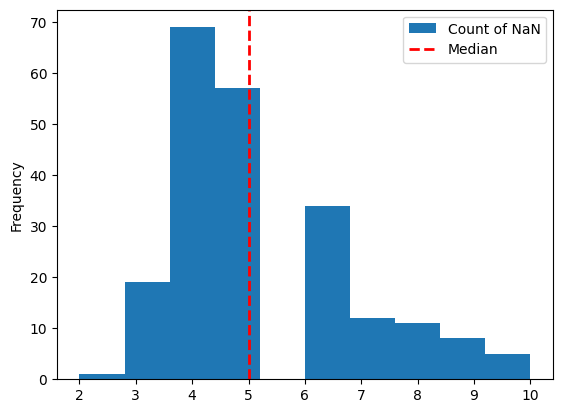

In [6]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df)
df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
median = dm.compute_max_nan(df_nb_nan,0.5)
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [7]:
importlib.reload(dm)

df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
print(df_step1_clean)

Country Name                                        Afghanistan      Albania  \
Series Name                                                                    
Adolescents out of school, male (% of male lowe...          NaN     5.903310   
Adults (ages 15+) and children (ages 0-14) newl...  1000.000000   100.000000   
CO2 emissions (kt)                                  5300.000191  4480.000019   
CO2 emissions from gaseous fuel consumption (kt)     319.029000   161.348000   
CPIA transparency, accountability, and corrupti...     2.000000          NaN   
Child employment in manufacturing (% of economi...          NaN          NaN   
Child employment in manufacturing, female (% of...          NaN          NaN   
Child employment in manufacturing, male (% of m...          NaN          NaN   
Military expenditure (% of general government e...     3.680251     3.787234   
Oil rents (% of GDP)                                   0.000867     1.156511   
People practicing open defecation (% of 

Construct a label by discretisation of an attribute (this label can be built by clustering the values of this attribute). Use this label as class label

In [8]:
import pandas as pd

df = pd.DataFrame({'attribute': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Discretize the attribute into 3 bins
df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# View the resulting dataframe
print(df)
df=df_step1_clean

   attribute   label
0          1     low
1          2     low
2          3     low
3          4     low
4          5  medium
5          6  medium
6          7  medium
7          8    high
8          9    high
9         10    high


In [9]:
df=df_step1_clean
df=df.iloc[1]
import pandas as pd

df = pd.DataFrame({'attribute': df})

# Discretize the attribute into 3 bins
df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# View the resulting dataframe
print(df)
df=df_step1_clean


              attribute label
Country Name                 
Afghanistan      1000.0   low
Albania           100.0   low
Algeria          1900.0   low
Angola          23000.0   low
Argentina        5500.0   low
...                 ...   ...
Uzbekistan       4300.0   low
Vietnam          9400.0   low
Yemen, Rep.       870.0   low
Zambia          61000.0   low
Zimbabwe        44000.0   low

[146 rows x 2 columns]


In [10]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
#classes = df_step1_clean
a=df_step1_clean.columns
objects=df_step1_clean
classes=[]
for i in range(len(a)):
    classes.append(a[i])
df = pd.DataFrame(classes, columns = ['Name'])
print(df)
# objects = df.drop(['species'],axis=1)
km=KMeans(n_clusters=3) # create a KMeans object



objects.fillna(0, inplace=True) #rajouter des 0 a la place des NAN
km.fit(objects) # compute the clusters
centroids=km.cluster_centers_ # get the cluster centers
print(centroids)


            Name
0    Afghanistan
1        Albania
2        Algeria
3         Angola
4      Argentina
..           ...
141   Uzbekistan
142      Vietnam
143  Yemen, Rep.
144       Zambia
145     Zimbabwe

[146 rows x 1 columns]
[[1.13258238e+02 1.23252712e+01 2.14028112e+02 2.56043914e+03
  6.11402669e+02 2.54554545e+00 1.01874260e+02 1.68303711e-01
  5.87359721e+01 1.38926619e+01 1.50775403e+02 2.25691825e+02
  4.76156395e-01 2.40732585e+01 3.29174024e+02 1.39267976e+01
  1.81302968e+02 1.27398055e+00 1.11350235e+03 5.33428626e+03
  5.67285259e+01 2.89304856e+02 2.46063478e+02 2.66475532e+01
  1.60368070e+02 2.67209938e+03 4.71057825e+02 6.27508430e+02
  3.90103940e+02 1.00272885e+03 1.14546337e+01 3.44683090e+03
  1.11512886e+03 1.06478664e+02 1.56325684e+03 1.15087769e+01
  2.11452887e+02 1.17933346e+01 2.26582161e+01 2.43822386e+01
  4.34572281e+02 2.90281893e+02 1.43635276e+00 1.22827019e+02
  5.35487272e+02 1.89282637e+03 2.26749399e+01 3.59694272e-01
  6.89444905e+02 2.24230741e

C:\Users\supqu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Chargement des données
data = pd.read_csv("mon_fichier.csv")

# Sélection de l'attribut à discrétiser
attribute = data['ma_colonne']

# Initialisation de l'algorithme de clustering K-means
kmeans = KMeans(n_clusters=3)

# Entraînement de l'algorithme sur l'attribut sélectionné
kmeans.fit(attribute.values.reshape(-1, 1))

# Récupération des labels de chaque valeur de l'attribut
labels = kmeans.labels_

# Ajout des labels comme colonne de classe dans les données
data['class_label'] = labels

# Affiche les données avec la nouvelle colonne de classe
print(data)


FileNotFoundError: [Errno 2] No such file or directory: 'mon_fichier.csv'

In [ ]:
# ##########################autre en plus
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# objects = discretizer.transform(data)
# print(objects)
# km=KMeans(n_clusters=3) # create a KMeans object

# labels = km.predict()
# #labels = kmeans.fit_predict(X_binned)
# from sklearn.cluster import KMeans
# # réc
# objects=df.iloc[0]
# print(objects)

# # Créez une instance de la classe KMeans avec le nombre de clusters souhaité, ici on prend 3.
# km = KMeans(n_clusters=3)


# km.fit(objects) # calcul le cluster
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


# # # Fit the model to the attribute data
# # kmeans.fit(df[['attribute']])

# # # Add the cluster labels as a new column
# # df['label'] = kmeans.labels_

# # # Assign the label column as the class label
# # df['class'] = df['label']




# #############################fichier classification.py en copier coller
# ##############################################
# import pandas as pd

# #data = pd.read_csv("data.txt", sep="\t")
# #valeurmanquante=data.isna()
# #valeurmanquante.sum(axis=0)
# #print(valeurmanquante)
# ##############################################
# #import
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt
# # #label by discretisation of an attribute
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# # data = pd.read_csv("data.txt", sep="\t")
# # data = data.drop(data.index[-5:])
# # print(data.tail())
# # # on a un tableau de données nommé "data" et je discrétiser la colonne d'indice 0

# # # supposons que vous avez un tableau de données nommé "X"
# # # et que vous souhaitez discrétiser la colonne d'indice 0

# # #centroids=km.cluster_centers_ # get the cluster centers
# # #print(centroids)
# # discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# # #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# # #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# # #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# # print(discretizer)
# # #avec un data numerique
# # data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# # a=discretizer.fit(data)# compute the clusters
# # print(a)
# # objects = discretizer.transform(data)
# # print(objects)
# # #objects = discretizer.fit_transform(data[:,0].reshape(-1, 1))

# # km=KMeans(n_clusters=3) # create a KMeans object

# # labels = km.predict()
# # #labels = kmeans.fit_predict(X_binned)

# # from sklearn.linear_model import LogisticRegression

# # # entraînez un modèle de régression logistique en utilisant les étiquettes comme étiquettes de classe
# # clf = LogisticRegression()
# # clf.fit(data, labels)

# #################yanis#############
# ###################################

# import pandas as pd
# import matplotlib.pyplot as plt
# import importlib
# import data_managment as dm

# importlib.reload(dm)
# originial_df = pd.read_csv("data.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df

# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

